# Spectractor Simulation

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : April 05th 2018


In [46]:
theNotebook="Run_SpectractorSim"

# Spectractor Launcher

In [47]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [48]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [49]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

2018-04-06 20:15:53  matplotlib.backends pylab_setup          DEBUG  backend module://ipykernel.pylab.backend_inline version unknown


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [51]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

Spectractor is supposed to be installed in paralel to Spectractorsim

In [52]:
PATH_SPECTRACTOR='../../Spectractor'
PATH_SPECTRACTORSIM='../../SpectractorSim'

In [53]:
sys.path.append(PATH_SPECTRACTOR)
sys.path.append(PATH_SPECTRACTORSIM)
#from common_notebook import *
#init_notebook()

## Spectractor 

In [54]:
from spectractor import *

In [55]:
from tools import *
from holo_specs import *
from targets import *
from optics import *
import parameters 

## SpectractorSim

In [56]:
from spectractorsim import *

# Configuration

## Input Directory

### So use HD205905

In [57]:
#inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
inputdir="/Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17"
#MIN_IMGNUMBER=208
MIN_IMGNUMBER=230
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2
subdir=os.path.basename(inputdir)

# Output directory

In [58]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory
outputdir="./simspectra"
#ensure_dir(outputdir)

# Logbook

For the moment, the logbook is in the local directory

In [59]:
file_logbook_csv='ctiofulllogbook_jun2017_v3.csv'
file_logbook_xlsx='../ctiofulllogbook_jun2017_v3.xlsx'

In [60]:
#df=pd.read_csv(file_logbook_csv,index_col=0)
df=pd.read_excel(file_logbook_xlsx,index_col=0)

In [61]:
df.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
215,2017-05-30T21:17:00.652,data_30may17,1,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_001.fits,NaN,NaN,NaN,NaN,NaN,NaN
147,2017-05-30T21:17:44.185,data_30may17,2,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_002.fits,NaN,NaN,NaN,NaN,NaN,NaN
13,2017-05-30T21:18:27.708,data_30may17,3,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.9,reduc_20170630_003.fits,NaN,NaN,NaN,NaN,NaN,NaN
45,2017-05-30T21:19:11.234,data_30may17,4,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_004.fits,NaN,NaN,NaN,NaN,NaN,NaN
218,2017-05-30T21:19:54.772,data_30may17,5,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_005.fits,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the relevant data and sort by the column index

In [62]:
all_obs=df.loc[(df["subdir"]==subdir) & (df["object"]==object_name),:].sort_values(by=['index'])

In [63]:
all_obs.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
71,2017-05-31T07:54:38.806,data_30may17,210,HD205905,dia,Ron400,1.101,60.0,12400,0.793,...,9.5,23,11.6,reduc_20170530_210.fits,790.0,700.0,100.0,100.0,NaN,NaN
39,2017-05-31T07:56:31.293,data_30may17,211,HD205905,dia,Thor300,1.097,60.0,12400,0.793,...,9.4,24,11.5,reduc_20170530_211.fits,790.0,700.0,100.0,100.0,NaN,NaN
5,2017-05-31T07:58:23.653,data_30may17,212,HD205905,dia,HoloPhP,1.094,60.0,12400,0.793,...,9.5,24,10.5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0,NaN,NaN
110,2017-05-31T08:00:16.053,data_30may17,213,HD205905,dia,HoloPhAg,1.090,120.0,12400,0.793,...,9.7,23,12.0,reduc_20170530_213.fits,790.0,700.0,100.0,100.0,NaN,NaN
149,2017-05-31T08:03:08.495,data_30may17,214,HD205905,dia,HoloAmAg,1.085,120.0,12400,0.793,...,9.6,23,13.4,reduc_20170530_214.fits,790.0,700.0,100.0,100.0,NaN,NaN


# Extract relevant info for SpectractorSim

In [64]:
target_tosimspec=all_obs[['index','object','airmass','filter','disperser','exposure','P','T','RH','file','date']]

In [65]:
target_tosimspec.head()

,index,object,airmass,filter,disperser,exposure,P,T,RH,file,date
71,210,HD205905,1.101,dia,Ron400,60.0,782,9.5,23,reduc_20170530_210.fits,2017-05-31T07:54:38.806
39,211,HD205905,1.097,dia,Thor300,60.0,782,9.4,24,reduc_20170530_211.fits,2017-05-31T07:56:31.293
5,212,HD205905,1.094,dia,HoloPhP,60.0,782,9.5,24,reduc_20170530_212.fits,2017-05-31T07:58:23.653
110,213,HD205905,1.090,dia,HoloPhAg,120.0,782,9.7,23,reduc_20170530_213.fits,2017-05-31T08:00:16.053
149,214,HD205905,1.085,dia,HoloAmAg,120.0,782,9.6,23,reduc_20170530_214.fits,2017-05-31T08:03:08.495


### Setting the parameters of SpectractorSim

In [66]:
parameters.DEBUG = True
parameters.VERBOSE = True

2018-04-06 20:15:56  spectractorsim SpectractorSim       INFO   
	Start SPECTRACTORSIM
2018-04-06 20:15:56  spectractorsim SpectractorSim       INFO   
	Will simulate the spectrum...
2018-04-06 20:15:56  spectractorsim SpectractorSim       INFO   
	Will debug simulated the spectrum into file ./simspectra/spectrasim_20170530_210.fits ...
2018-04-06 20:15:56  Atmosphere simulate             INFO   
	Atmosphere.simulate am=1.10, P=782.00, for data-file=reduc_20170530_210.fits 


******* spectrum id= reduc_20170530_210.fits  airmass = 1.101  pressure = 782


2018-04-06 20:21:06  Atmosphere savefile             INFO   
	Atmosphere.save atm-file=./simspectra/atmsim_20170530_210.fits


ATMSIM  = 'libradtran'                                                          SIMVERS = '2.0.1   '                                                            DATAFILE= 'reduc_20170530_210.fits'                                             SIMUFILE= 'atmsim_20170530_210.fits'                                            AIRMASS =                1.101                                                  PRESSURE=                  782                                                  TEMPERAT=                  9.5                                                  NBATMPTS=                   75                                                  NBAERPTS=                    5                                                  AERMIN  =                  0.0                                                  AERMAX  =                  0.1                                                  NBPWVPTS=                    5                                                  PWVMIN  =                  0.0          

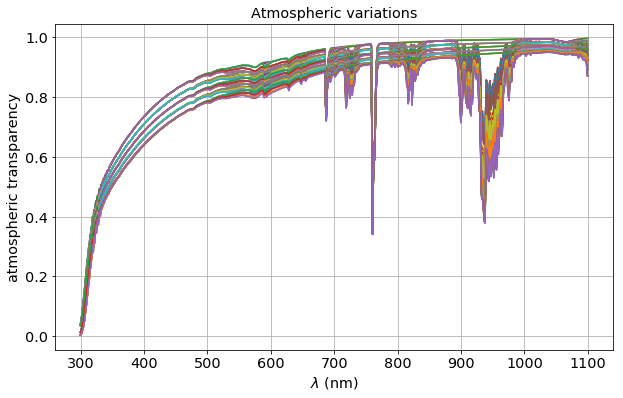

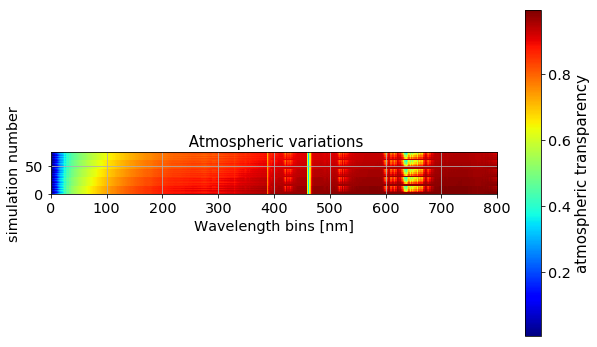

2018-04-06 20:21:07  spectractorsim SpectractorSim       INFO   
	 ========= Telescope transmission :  ===============
2018-04-06 20:21:07  spectractorsim SpectractorSim       INFO   
	 ========= Disperser transmission :  ===============
2018-04-06 20:21:07  spectractorsim SpectractorSim       INFO   
	 ========= SED : HD205905  ===============


 MAIN_ID        RA           DEC      ... SP_QUAL_2     SP_BIBCODE_2   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits


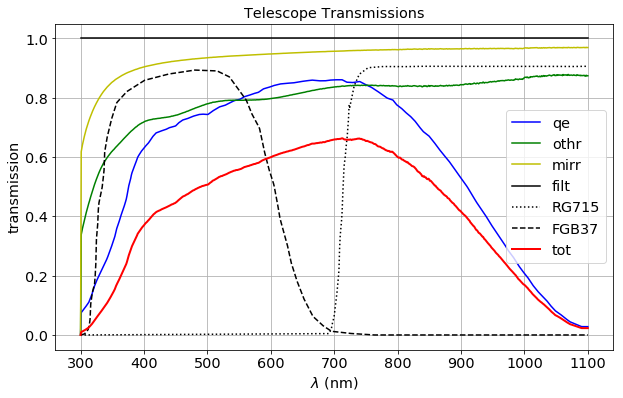

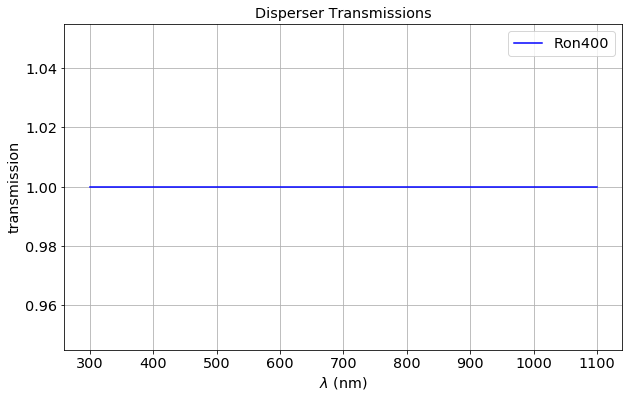

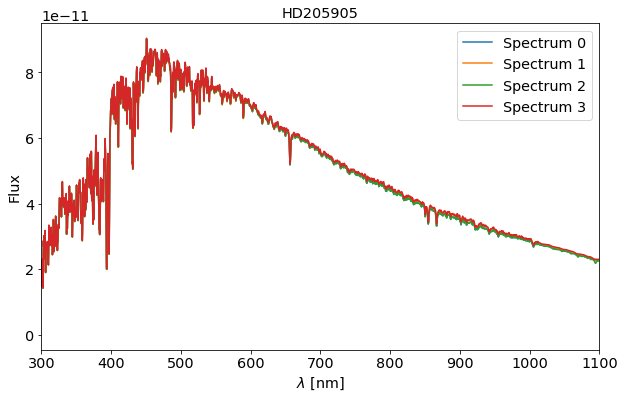

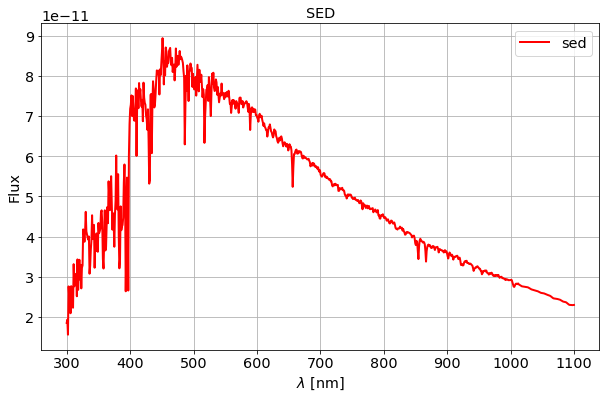

2018-04-06 20:21:08  SpectrumSim save_spectra         INFO   
	SPECTRA.save atm-file=./simspectra/spectrasim_20170530_210.fits


ATMSIM  = 'libradtran'                                                          SIMVERS = '2.0.1   '                                                            DATAFILE= 'reduc_20170530_210.fits'                                             SIMUFILE= 'atmsim_20170530_210.fits'                                            AIRMASS =                1.101                                                  PRESSURE=                  782                                                  TEMPERAT=                  9.5                                                  NBATMPTS=                   75                                                  NBAERPTS=                    5                                                  AERMIN  =                  0.0                                                  AERMAX  =                  0.1                                                  NBPWVPTS=                    5                                                  PWVMIN  =                  0.0          

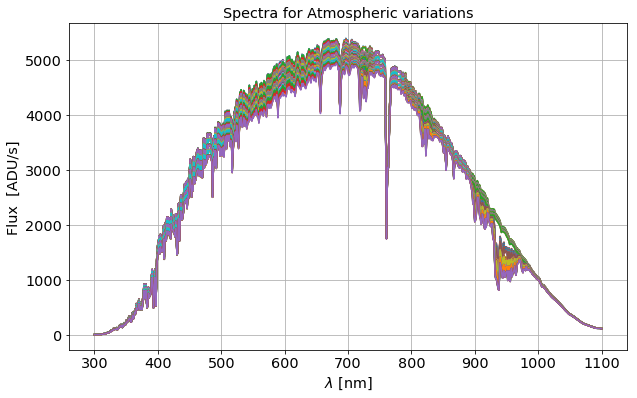

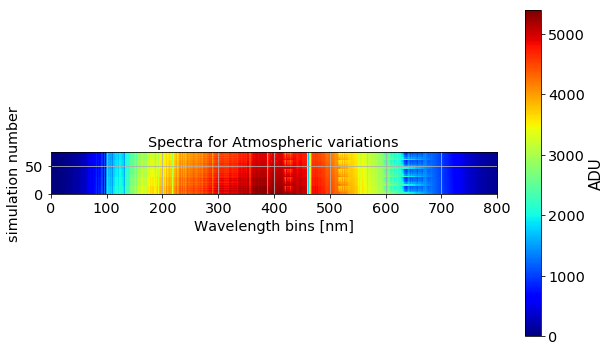

In [67]:
for index, row in target_tosimspec.iterrows():
    index=row['file']
    targetname=row['object']
    airmass=row['airmass']
    filename_data=row['file']
    filtername=row['filter']
    dispersername=row['disperser']
    exposure=row['exposure']
    pressure=row['P']
    temperature=row['T']
    rhumidity=row['RH']
    date=row['date']
    print '******* spectrum id=',index, ' airmass =',airmass,' pressure =',pressure
    SpectractorSim(filename_data,outputdir,targetname,index,airmass,pressure,temperature,rhumidity,exposure,filtername,dispersername)
    break